In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib as mp
from pathlib import Path

# Read the CSV data
stress_csv = pd.read_csv("corporate_stress_dataset.csv")

# Select relevant columns and rename them
factors = stress_csv[["Gender", "Gender_Bias_Experienced", "Stress_Level", "Family_Support_Level", "Team_Size", 
                      "Physical_Activity_Hours_per_Week", "Sleep_Hours", "Remote_Work"]]

factors.rename(columns={
    "Gender_Bias_Experienced": "Gender Bias Experienced?", 
    "Stress_Level": "Stress Level 1 - 10", 
    "Family_Support_Level": "Familial Support Level 1 - 10", 
    "Team_Size": "Team Size", 
    "Physical_Activity_Hours_per_Week": "Physical Activity Hours per Week", 
    "Sleep_Hours": "Sleep Hours per Night", 
    "Remote_Work": "Remote Work?"
}, inplace=True)

# Display the first few rows
print(factors.head())


       Gender  Gender Bias Experienced?  Stress Level 1 - 10  \
0  Non-Binary                      True                    0   
1      Female                      True                    7   
2      Female                     False                    7   
3      Female                      True                    6   
4        Male                     False                    8   

   Familial Support Level 1 - 10  Team Size  Physical Activity Hours per Week  \
0                              2         38                               1.9   
1                              1         72                               3.5   
2                              1         67                               8.4   
3                             10         98                               6.4   
4                              1         85                               9.2   

   Sleep Hours per Night  Remote Work?  
0                    5.6          True  
1                    9.0          True  
2    

C:\Users\drago\AppData\Local\Temp\ipykernel_37900\39463388.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factors.rename(columns={


In [4]:
# Check for missing values in relevant columns
missing_values = factors[['Familial Support Level 1 - 10', 'Stress Level 1 - 10']].isnull().sum()
print("Missing values:\n", missing_values)

# Compute correlation (Spearman for ordinal data)
correlation = factors[['Familial Support Level 1 - 10', 'Stress Level 1 - 10']].corr(method='spearman')
print("\nSpearman Correlation between Familial Support Level 1 - 10 and Stress Level 1 - 10:")
print(correlation)

# Check the unique values of both columns
print("Unique values in Familial Support Level 1 - 10:", factors['Familial Support Level 1 - 10'].unique())
print("Unique values in Stress Level 1 - 10:", factors['Stress Level 1 - 10'].unique())


Missing values:
 Familial Support Level 1 - 10    0
Stress Level 1 - 10              0
dtype: int64

Spearman Correlation between Familial Support Level 1 - 10 and Stress Level 1 - 10:
                               Familial Support Level 1 - 10  \
Familial Support Level 1 - 10                       1.000000   
Stress Level 1 - 10                                 0.000062   

                               Stress Level 1 - 10  
Familial Support Level 1 - 10             0.000062  
Stress Level 1 - 10                       1.000000  
Unique values in Familial Support Level 1 - 10: [ 2  1 10  0  4  5  9  6  3  7  8]
Unique values in Stress Level 1 - 10: [ 0  7  6  8  2  4  1  9  3 10  5]


C:\Users\drago\AppData\Local\Temp\ipykernel_37900\2704807193.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factors['Remote Work?'] = factors['Remote Work?'].astype(str)
C:\Users\drago\AppData\Local\Temp\ipykernel_37900\2704807193.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Remote Work?', y='Stress Level 1 - 10', data=factors, palette=violin_colors)


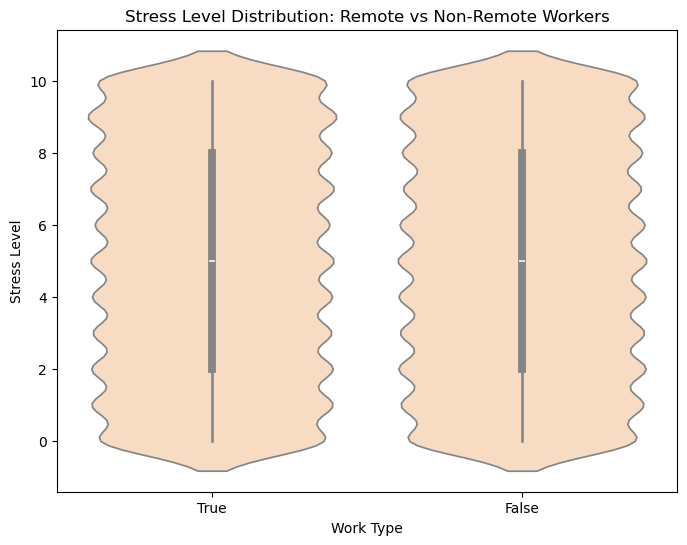

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Remote Work?' is categorical
factors['Remote Work?'] = factors['Remote Work?'].astype(str)

# Define a color function based on stress level
def get_violin_color(value):
    if value <= 4:  # Low stress
        return "#B8B878"  # Green
    elif value <= 7:  # Medium stress
        return "#FFDBBB"  # Orange
    else:  # High stress
        return "#A8332A"  # Dark Red

# Map colors based on median stress level for each category
median_stress = factors.groupby('Remote Work?')['Stress Level 1 - 10'].median()
violin_colors = [get_violin_color(val) for val in median_stress]

# Violin Plot to visualize stress levels for remote vs non-remote workers
plt.figure(figsize=(8, 6))
sns.violinplot(x='Remote Work?', y='Stress Level 1 - 10', data=factors, palette=violin_colors)

plt.title('Stress Level Distribution: Remote vs Non-Remote Workers')
plt.xlabel('Work Type')
plt.ylabel('Stress Level')

plt.show()


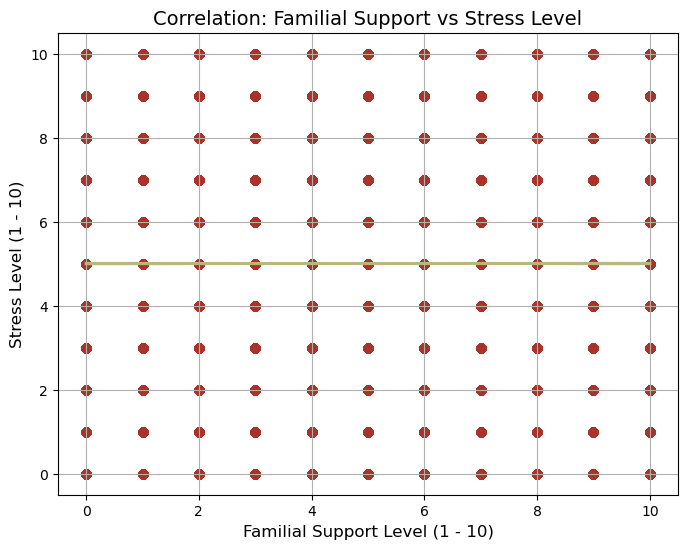

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=factors['Familial Support Level 1 - 10'], 
            y=factors['Stress Level 1 - 10'], 
            scatter_kws={'color': '#A8332A', 'alpha': 0.7},  # Dark Red for points
            line_kws={'color': '#B8B878'})  # Green for regression line

plt.title("Correlation: Familial Support vs Stress Level", fontsize=14)
plt.xlabel("Familial Support Level (1 - 10)", fontsize=12)
plt.ylabel("Stress Level (1 - 10)", fontsize=12)
plt.grid(True)
plt.show()


C:\Users\drago\AppData\Local\Temp\ipykernel_37900\809615590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factors['Remote Work?'] = factors['Remote Work?'].astype(str)
C:\Users\drago\AppData\Local\Temp\ipykernel_37900\809615590.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_stress.index, y=mean_stress.values, palette=colors)


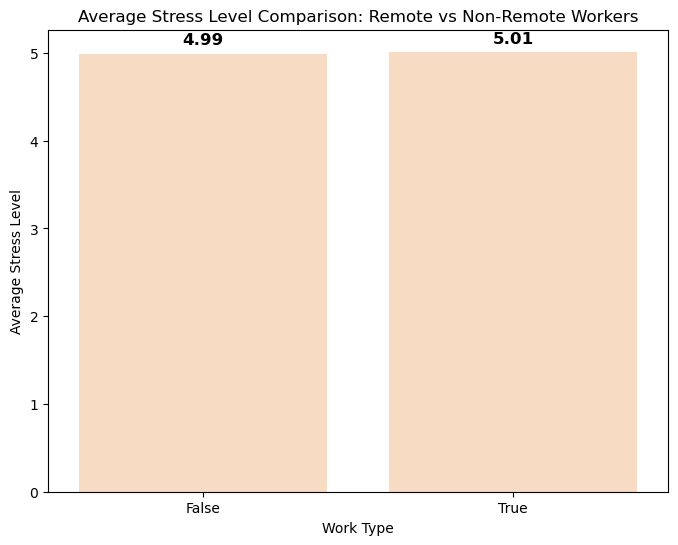

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Remote Work?' is categorical
factors['Remote Work?'] = factors['Remote Work?'].astype(str)

# Calculate the average stress level for remote and non-remote workers
mean_stress = factors.groupby('Remote Work?')['Stress Level 1 - 10'].mean()

# Define a color function based on stress level
def get_color(value):
    if value <= 4:  # Low stress
        return "#B8B878"  # Green
    elif value <= 7:  # Medium stress
        return "#FFDBBB"  # Orange
    else:  # High stress
        return "#A8332A"  # Dark Red

# Apply color mapping
colors = [get_color(val) for val in mean_stress]  # Convert Series to list for proper color mapping

# Bar Plot for average stress levels with conditional colors
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_stress.index, y=mean_stress.values, palette=colors)

plt.title('Average Stress Level Comparison: Remote vs Non-Remote Workers')
plt.xlabel('Work Type')
plt.ylabel('Average Stress Level')

# Show values on bars
for i, val in enumerate(mean_stress.values):
    plt.text(i, val + 0.1, f"{val:.2f}", ha='center', fontsize=12, fontweight='bold')

plt.show()


C:\Users\drago\AppData\Local\Temp\ipykernel_37900\3488308219.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=factors['Remote Work?'],


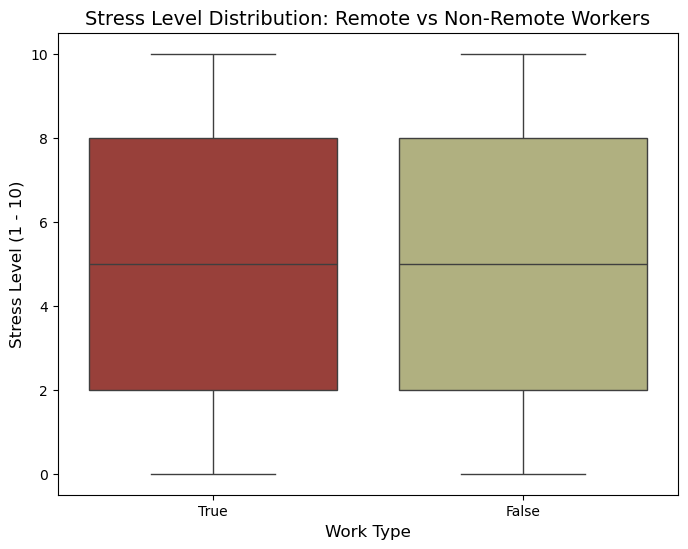

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define colors based on the stress level range
palette = {"True": "#A8332A", "False": "#B8B878"}  # Dark Red for Remote, Green for Non-Remote

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=factors['Remote Work?'], 
            y=factors['Stress Level 1 - 10'], 
            palette=[palette[str(val)] for val in factors['Remote Work?'].unique()])

plt.title("Stress Level Distribution: Remote vs Non-Remote Workers", fontsize=14)
plt.xlabel("Work Type", fontsize=12)
plt.ylabel("Stress Level (1 - 10)", fontsize=12)

plt.show()
